<a href="https://colab.research.google.com/github/ZarinSaima333/Bracu_CSE428_Image_processing/blob/main/Roza_Another_copy_of_CSE_428_Lab_2___demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from skimage import io, color, exposure
import matplotlib.pyplot as plt


In [ ]:
np.random.seed(1000)
I = np.random.rand(3, 3)
print(I)

[[0.65358959 0.11500694 0.95028286]
 [0.4821914  0.87247454 0.21233268]
 [0.04070962 0.39719446 0.2331322 ]]


(-0.5, 2.5, 2.5, -0.5)

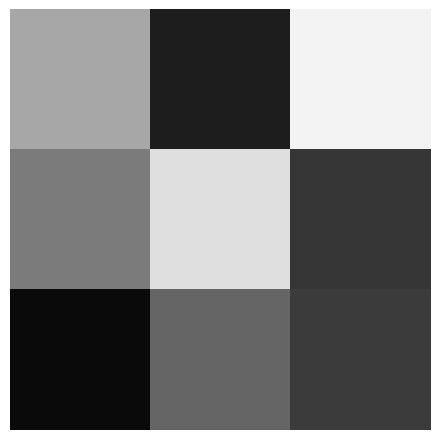

In [ ]:
io.imshow(I)
plt.axis("off")

In [ ]:
# option 1
I2 = I + 0.5
print(I2)
I2[I2 > 1] = 1
I2[I2 < 0] = 0

[[1.15358959 0.61500694 1.45028286]
 [0.9821914  1.37247454 0.71233268]
 [0.54070962 0.89719446 0.7331322 ]]


(-0.5, 2.5, 2.5, -0.5)

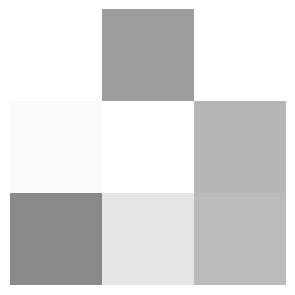

In [ ]:
# option 2 (alternative of option 1)
I2 = np.clip(I+0.5, 0, 1)
plt.subplot(1, 2, 1)
io.imshow(I2)
plt.axis("off")

(-0.5, 2.5, 2.5, -0.5)

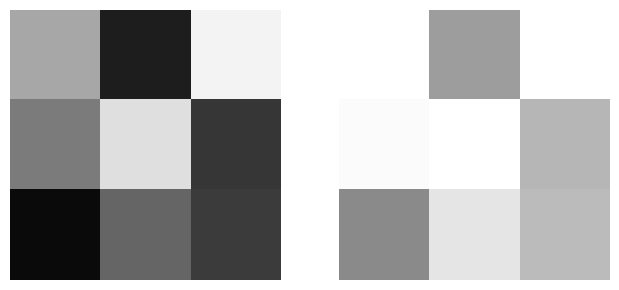

In [ ]:
plt.subplot(1, 2, 1)
io.imshow(I)
plt.axis("off")

plt.subplot(1, 2, 2)
io.imshow(I2)
plt.axis("off")

In [ ]:
I3 = np.clip(I - 0.5, 0, 1)

Text(0.5, 1.0, 'I-0.5')

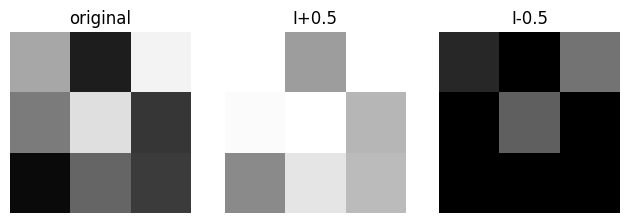

In [ ]:
plt.subplot(1, 3, 1)
io.imshow(I)
plt.axis("off")
plt.title("original")

plt.subplot(1, 3, 2)
io.imshow(I2)
plt.axis("off")
plt.title("I+0.5")

plt.subplot(1, 3, 3)
io.imshow(I3)
plt.axis("off")
plt.title("I-0.5")

Text(0.5, 1.0, 'I/2')

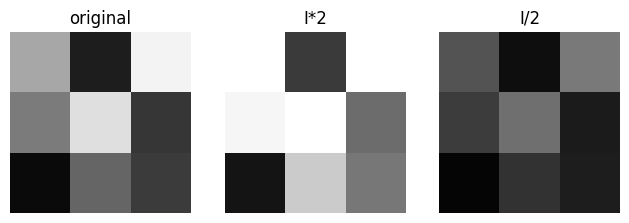

In [ ]:
I2 = np.clip(I*2, 0, 1)
I3 = np.clip(I/2, 0, 1)

plt.subplot(1, 3, 1)
io.imshow(I)
plt.axis("off")
plt.title("original")

plt.subplot(1, 3, 2)
io.imshow(I2)
plt.axis("off")
plt.title("I*2")

plt.subplot(1, 3, 3)
io.imshow(I3)
plt.axis("off")
plt.title("I/2")

In [ ]:
!ls

'391 What is React_.mp4'   angiogram_bw.jpeg   landsat_down.jpeg   sample_data	 xray.jpeg


In [ ]:
I = io.imread("landsat_down.jpeg")
I = I/255.0
I.shape

(1901, 2010)

In [ ]:
print(I.min())
print(I.max())

0.0
1.0


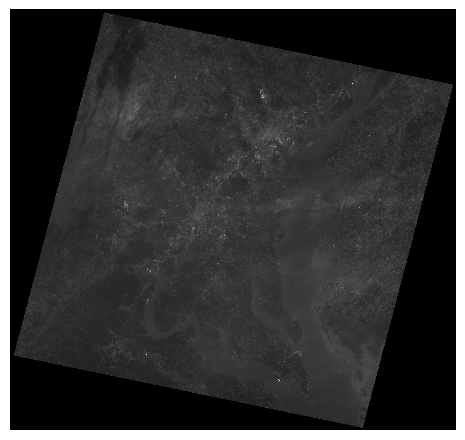

In [ ]:
io.imshow(I)
plt.axis("off")
plt.show()

In [ ]:
#WRONG
I_stretched = 4*(I-0.1)

In [ ]:
print(I_stretched.min())
print(I_stretched.max())

-0.4
3.6


In [ ]:
#RIGHT
# Contrast stretching
I_stretched = np.clip(4*(I-0.1), 0, 1)

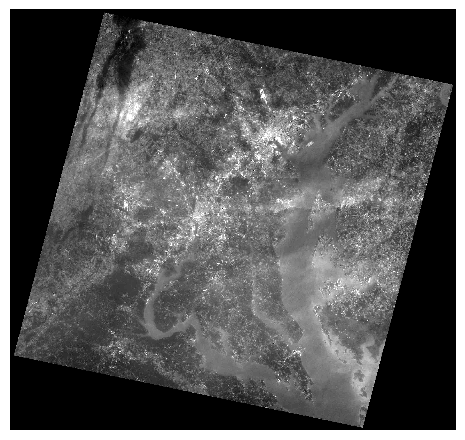

In [ ]:
io.imshow(I_stretched)
plt.axis("off")
plt.show()

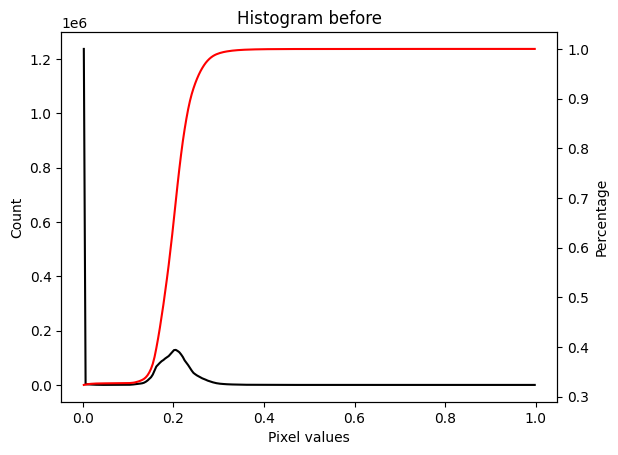

In [ ]:
hist, bins_hist = exposure.histogram(I, nbins=256, normalize=False)
plt.plot(bins_hist, hist, 'k')
plt.xlabel("Pixel values")
plt.ylabel("Count")
plt.title("Histogram before")

plt.twinx()
img_cdf, bins = exposure.cumulative_distribution(I, 256)
plt.plot(bins, img_cdf, "red")
plt.ylabel("Percentage")
plt.show()

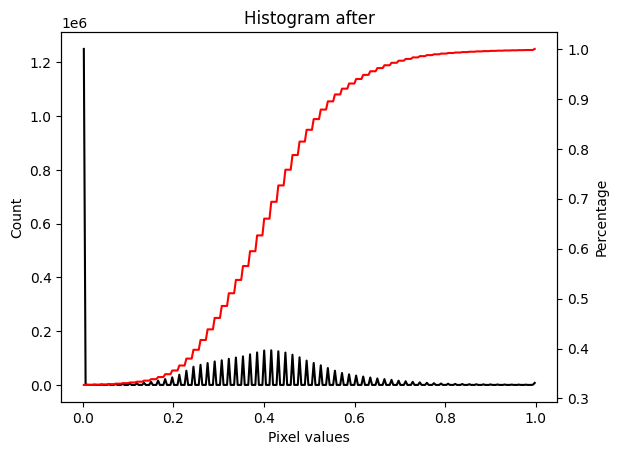

In [ ]:
hist, bins_hist = exposure.histogram(I_stretched, nbins=256, normalize=False)
plt.plot(bins_hist, hist, 'k')
plt.xlabel("Pixel values")
plt.ylabel("Count")
plt.title("Histogram after")

plt.twinx()
img_cdf, bins = exposure.cumulative_distribution(I_stretched, 256)
plt.plot(bins, img_cdf, "red")
plt.ylabel("Percentage")
plt.show()

In [ ]:
I = io.imread("xray.jpeg")/255
I = color.rgb2gray(I)

(-0.5, 3536.5, 2830.5, -0.5)

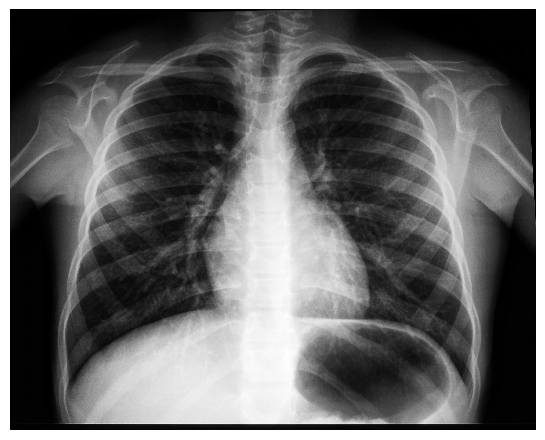

In [ ]:
io.imshow(I)
plt.axis("off")

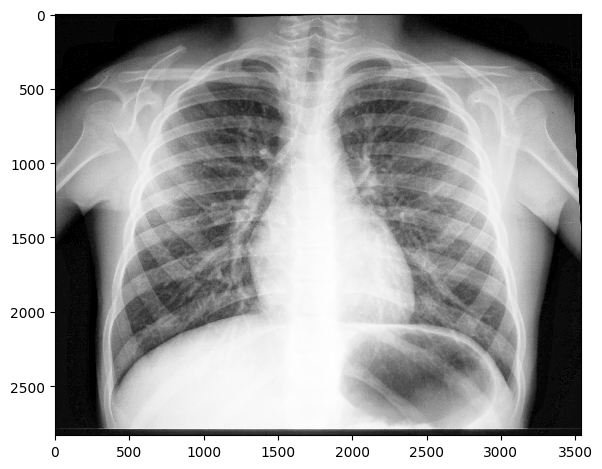

In [ ]:
# Log Transformation
# s = c log(1 + r)
k = 20
I2 = np.log(1 + k*I)
I2 = I2/I2.max()
io.imshow(I2)

In [ ]:
# Negative Image
I3 = 1 - I

(-0.5, 3536.5, 2830.5, -0.5)

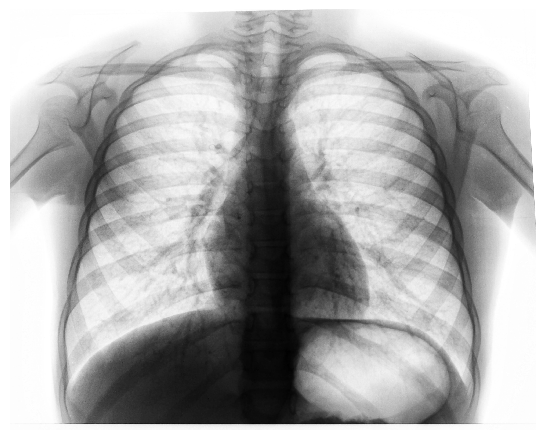

In [ ]:
io.imshow(I3)
plt.axis("off")

In [ ]:
# power law transformatiom
gamma = 3
c = 1

I4 = c*(I ** gamma)
print(I4.min())
print(I4.max())

0.0
0.9975020827546299


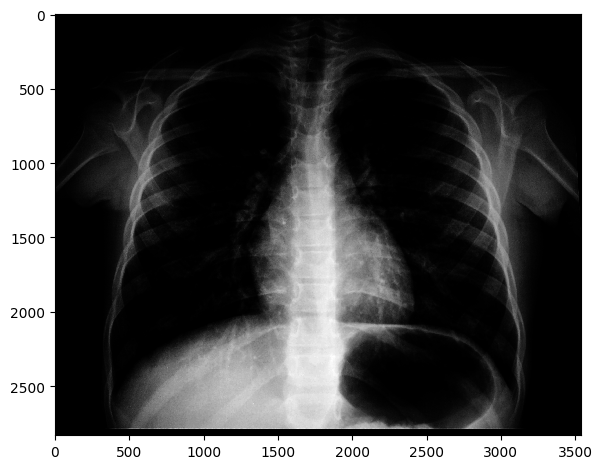

In [ ]:
io.imshow(I4)

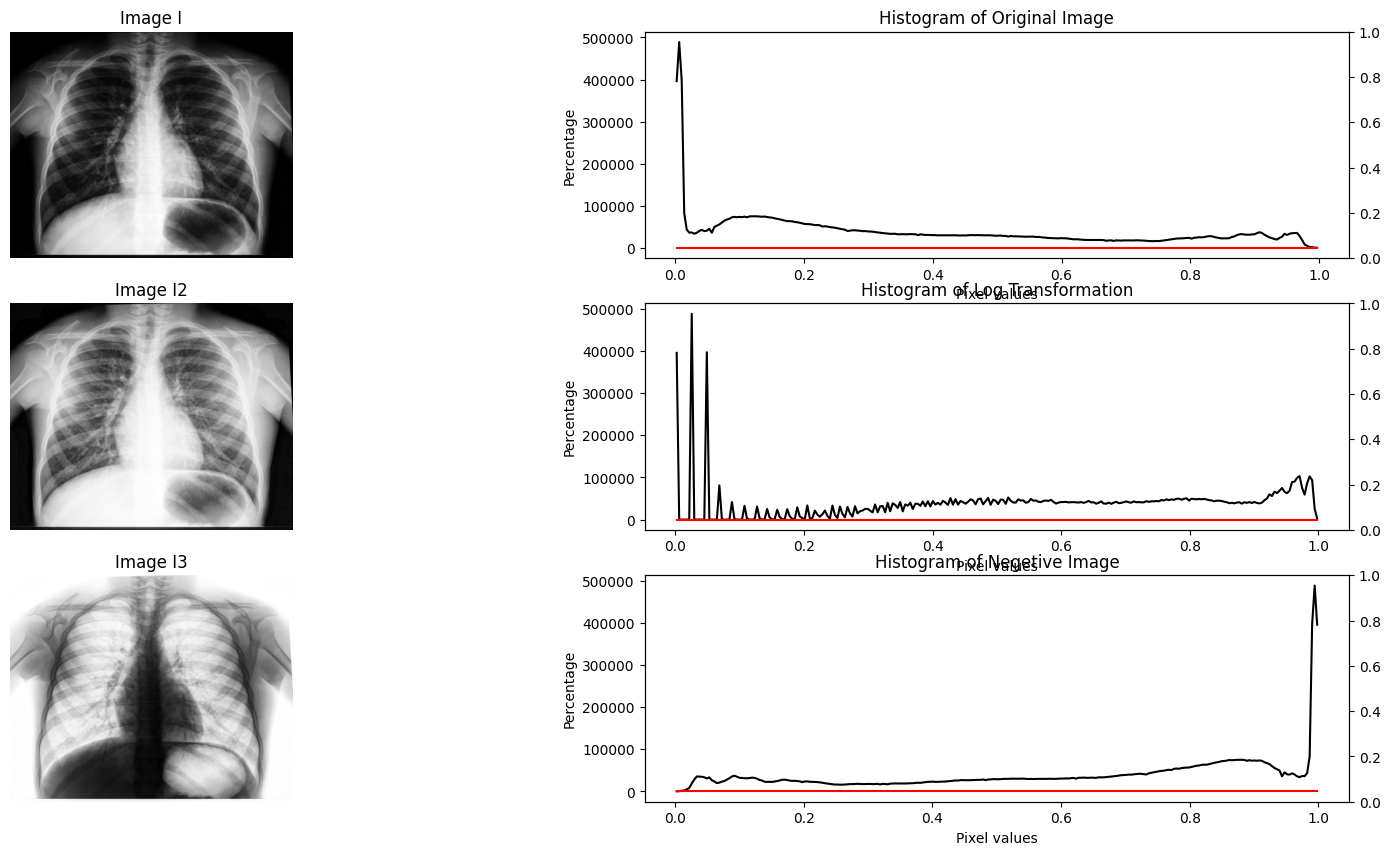

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))

# First row
axes[0, 0].imshow(I, cmap = 'gray')
axes[0, 0].axis("off")
axes[0, 0].set_title("Image I")

hist, bins_hist = exposure.histogram(I, nbins=256, normalize=False)
axes[0, 1].plot(bins_hist, hist, 'k')
axes[0, 1].set_xlabel("Pixel values")
axes[0, 1].set_ylabel("Count")
axes[0, 1].set_title("Histogram of Original Image")
img_cdf, bins = exposure.cumulative_distribution(I, 256)
axes[0, 1].twinx()
axes[0, 1].plot(bins, img_cdf, "red")
axes[0, 1].set_ylabel("Percentage")

# Second row
axes[1, 0].imshow(I2, cmap = 'gray')
axes[1, 0].axis("off")
axes[1, 0].set_title("Image I2")

hist, bins_hist = exposure.histogram(I2, nbins=256, normalize=False)
axes[1, 1].plot(bins_hist, hist, 'k')
axes[1, 1].set_xlabel("Pixel values")
axes[1, 1].set_ylabel("Count")
axes[1, 1].set_title("Histogram of Log Transformation")
img_cdf, bins = exposure.cumulative_distribution(I2, 256)
axes[1, 1].twinx()
axes[1, 1].plot(bins, img_cdf, "red")
axes[1, 1].set_ylabel("Percentage")

# Third row
axes[2, 0].imshow(I3, cmap = 'gray')
axes[2, 0].axis("off")
axes[2, 0].set_title("Image I3")

hist, bins_hist = exposure.histogram(I3, nbins=256, normalize=False)
axes[2, 1].plot(bins_hist, hist, 'k')
axes[2, 1].set_xlabel("Pixel values")
axes[2, 1].set_ylabel("Count")
axes[2, 1].set_title("Histogram of Negetive Image")
img_cdf, bins = exposure.cumulative_distribution(I3, 256)
axes[2, 1].twinx()
axes[2, 1].plot(bins, img_cdf, "red")
axes[2, 1].set_ylabel("Percentage")

plt.show()

In [ ]:
I = io.imread("angiogram_bw.jpeg")
I = I[:,:]/255  # Normalizing
I.shape
print(I)

[[0.41960784 0.44313725 0.43921569 ... 0.28627451 0.29019608 0.30196078]
 [0.44313725 0.43529412 0.43529412 ... 0.34117647 0.3372549  0.25882353]
 [0.4627451  0.42745098 0.43137255 ... 0.34901961 0.36078431 0.25098039]
 ...
 [0.3372549  0.36470588 0.35294118 ... 0.49411765 0.47058824 0.45882353]
 [0.3372549  0.34509804 0.32941176 ... 0.49411765 0.47843137 0.46666667]
 [0.36862745 0.35294118 0.32941176 ... 0.49019608 0.46666667 0.45490196]]


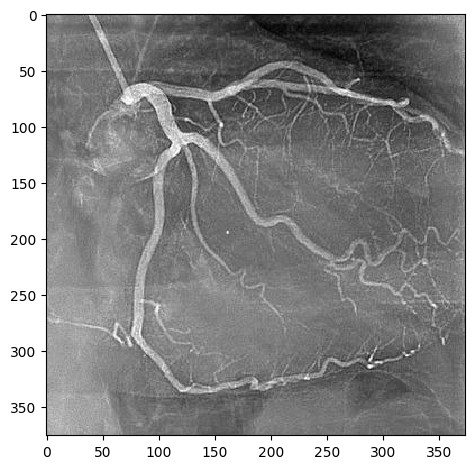

In [ ]:
io.imshow(1-I)
#plt.axis("off")

In [ ]:
negImg = 1 - I

## **Problem**

In [ ]:
#treshold

A = 0.6
B = 0.85

# wrong
# negImg[negImg >= A] = 1
# negImg[negImg <= B] = 1

# right
negImg[(negImg >= A) & (negImg <= B)] = 1

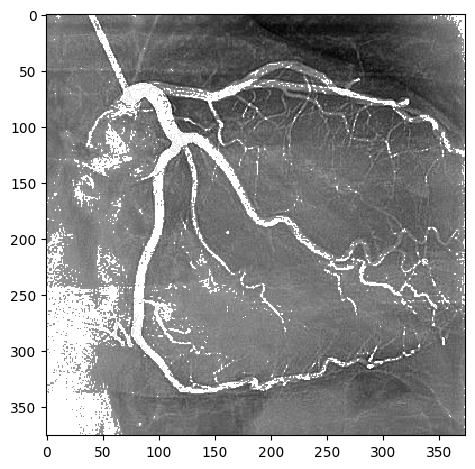

In [ ]:
io.imshow(negImg)

In [ ]:
negImg2 = 1 - I

In [ ]:
A = 0.6
B = 0.85

negImg2[(negImg2 >= A) & (negImg2 <= B)] = 1

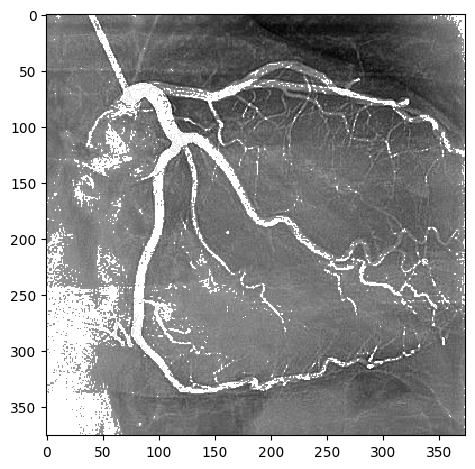

In [ ]:
io.imshow(negImg2)

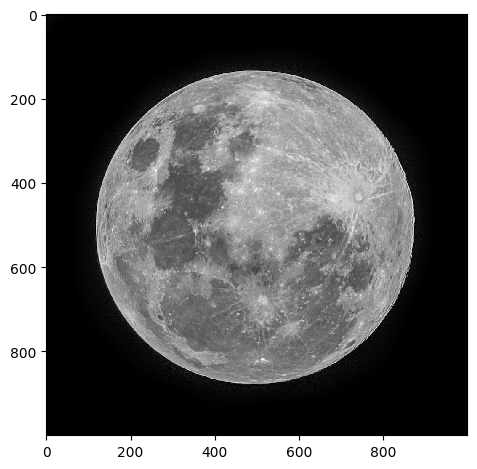

In [ ]:
I = io.imread("moon.jpg")
I = I[:,:]/255
I.shape

io.imshow(I)
#plt.axis("off")

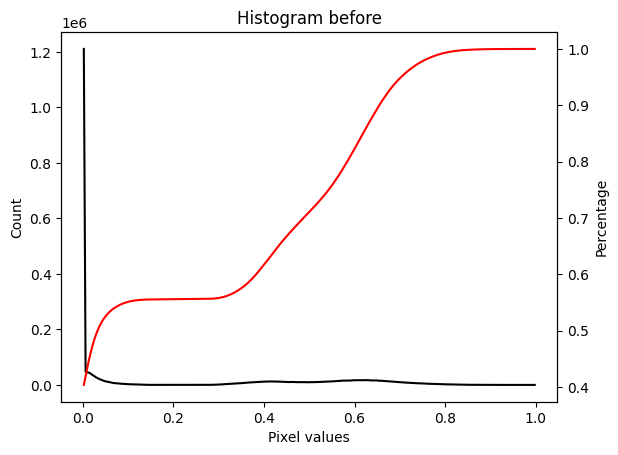

In [ ]:
hist, bins_hist = exposure.histogram(I, nbins=256, normalize=False)
plt.plot(bins_hist, hist, 'k')
plt.xlabel("Pixel values")
plt.ylabel("Count")
plt.title("Histogram before")

plt.twinx()
img_cdf, bins = exposure.cumulative_distribution(I, 256)
plt.plot(bins, img_cdf, "red")
plt.ylabel("Percentage")
plt.show()

In [ ]:

c2= 0.4
c1 = 0.8/c2
I_stretched = np.clip(c1*(I-c2), 0, 1)

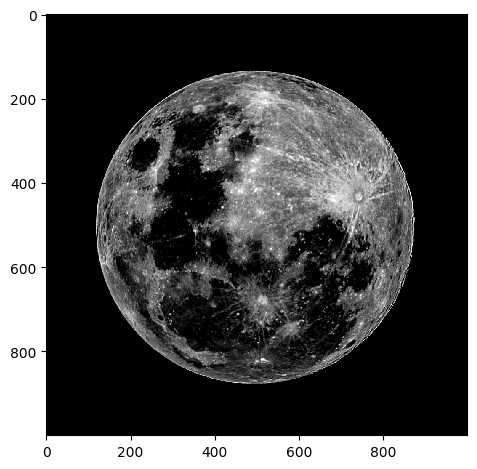

In [ ]:
io.imshow(I_stretched)

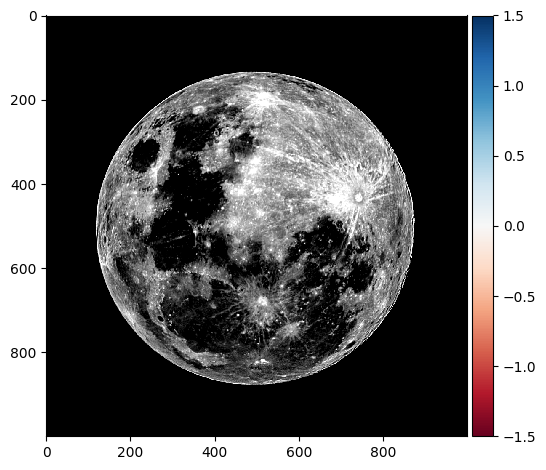

In [ ]:
I_stretched = (I-.4)/(.8-.4)
io.imshow(I_stretched);;;

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


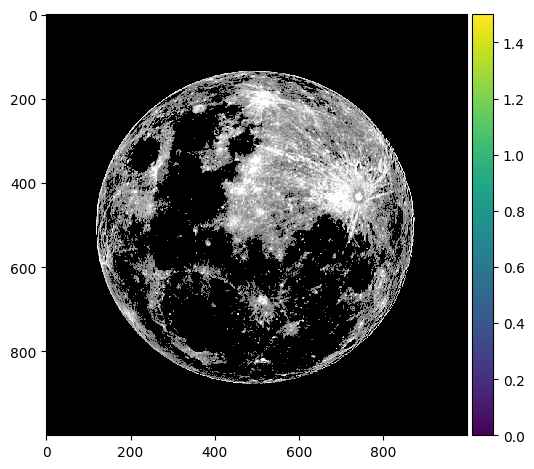

In [ ]:
I_stretched[I_stretched < .4] = 0


io.imshow(I_stretched)
